In [2]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1803,ham,I'm in class. Did you get my text.,NaN,NaN,NaN
2633,ham,That's what I love to hear :V see you sundayis...,NaN,NaN,NaN
2374,ham,Dunno lei he neva say...,NaN,NaN,NaN
989,ham,Ugh. Gotta drive back to sd from la. My butt i...,NaN,NaN,NaN
3810,ham,Excellent! Wish we were together right now!,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

## 1.Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],inplace=True)

In [15]:
df.sample(5)

,v1,v2
1347,ham,She doesnt need any test.
5221,ham,"Jane babes not goin 2 wrk, feel ill after lst ..."
438,ham,"Hi hope u get this txt~journey hasnt been gd,n..."
2513,spam,U have won a nokia 6230 plus a free digital ca...
4101,ham,Ok then i will come to ur home after half an hour


In [17]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5296,ham,Are u coming to the funeral home
1568,ham,Today is ACCEPT DAY..U Accept me as? Brother S...
4764,ham,if you text on your way to cup stop that shoul...
4791,ham,Gd luck 4 ur exams :-)
285,ham,"K, I might come by tonight then if my class le..."


In [19]:
!pip install scikit-learn

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [23]:
df['target'] = encoder.fit_transform(df['target'])

In [25]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [29]:
df.duplicated().sum()

403

In [31]:
df = df.drop_duplicates(keep='first')

In [33]:
df.duplicated().sum()

0

In [35]:
df.shape

(5169, 2)

## 2.EDA

In [38]:
 df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [42]:
!pip install matplotlib


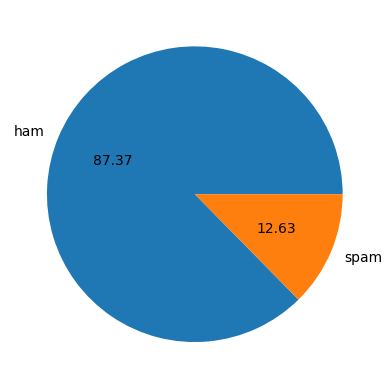

In [44]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'],autopct="%0.2f")
plt.show()

In [46]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import pandas as pd

In [48]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))

In [52]:
df.head()

,target,text,num_words
0,0,"Go until jurong point, crazy.. Available only ...",24
1,0,Ok lar... Joking wif u oni...,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37
3,0,U dun say so early hor... U c already then say...,13
4,0,"Nah I don't think he goes to usf, he lives aro...",15


In [54]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(sent_tokenize(x)))

In [56]:
print(df[['num_characters', 'num_words', 'num_sentences']].describe())

       num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000


In [58]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [60]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [62]:
!pip install seaborn

In [64]:
import seaborn as sns

In [66]:
df[df['target'] == 0]

,target,text,num_words,num_characters,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1
6,0,Even my brother is not like to speak with me. ...,18,77,2
...,...,...,...,...,...
5565,0,Huh y lei...,4,12,1
5568,0,Will Ì_ b going to esplanade fr home?,9,37,1
5569,0,"Pity, * was in mood for that. So...any other s...",15,57,2
5570,0,The guy did some bitching but I acted like i'd...,27,125,1


In [68]:
import matplotlib.pyplot as plt

<Axes: xlabel='num_characters', ylabel='Count'>

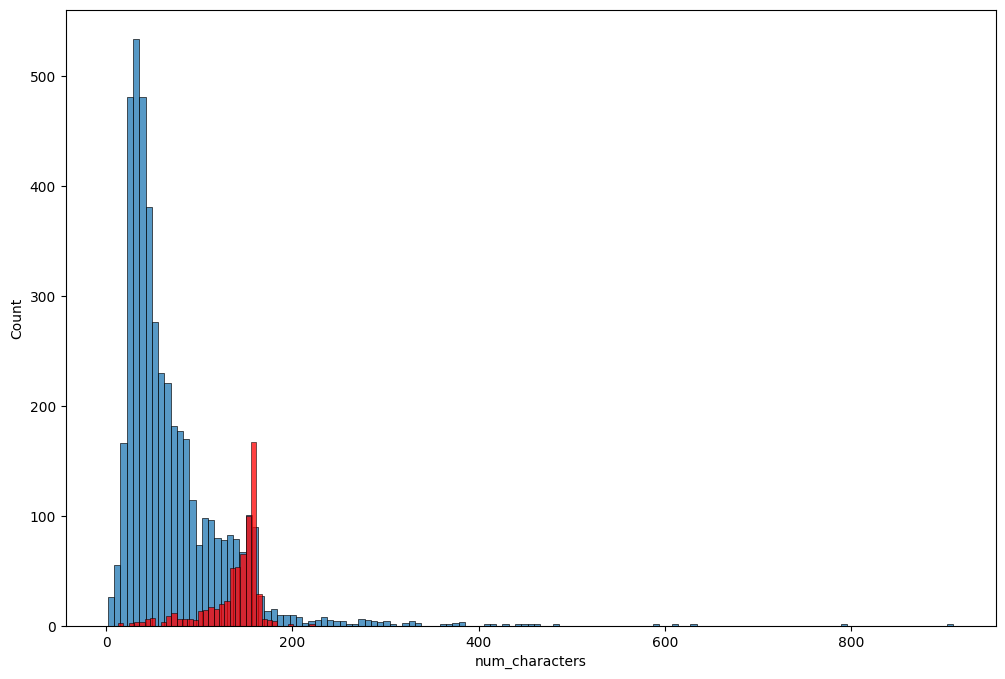

In [70]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

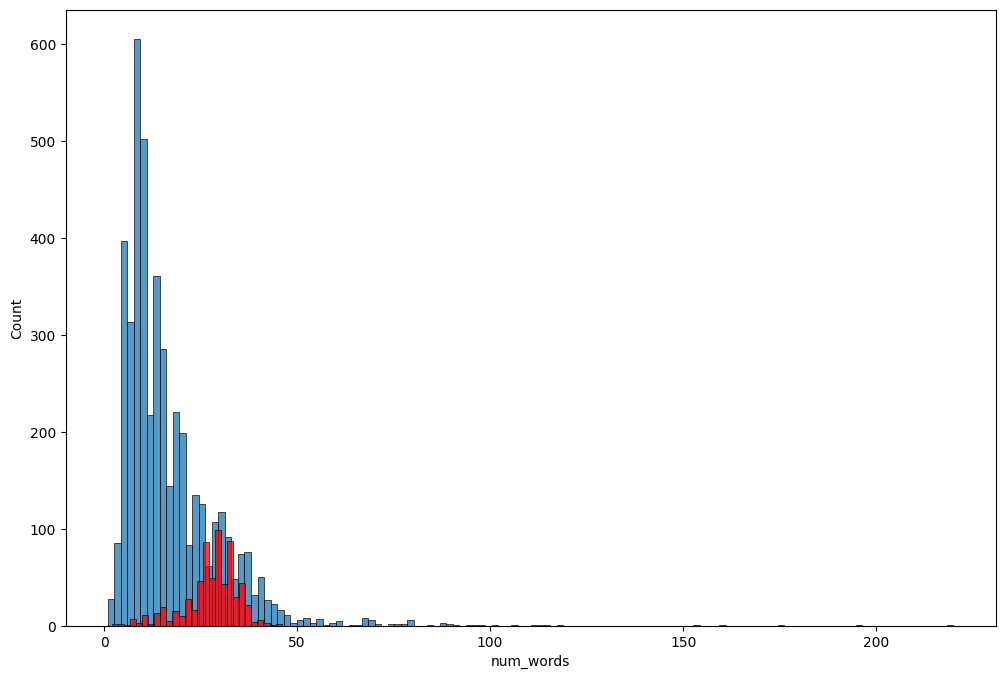

In [72]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

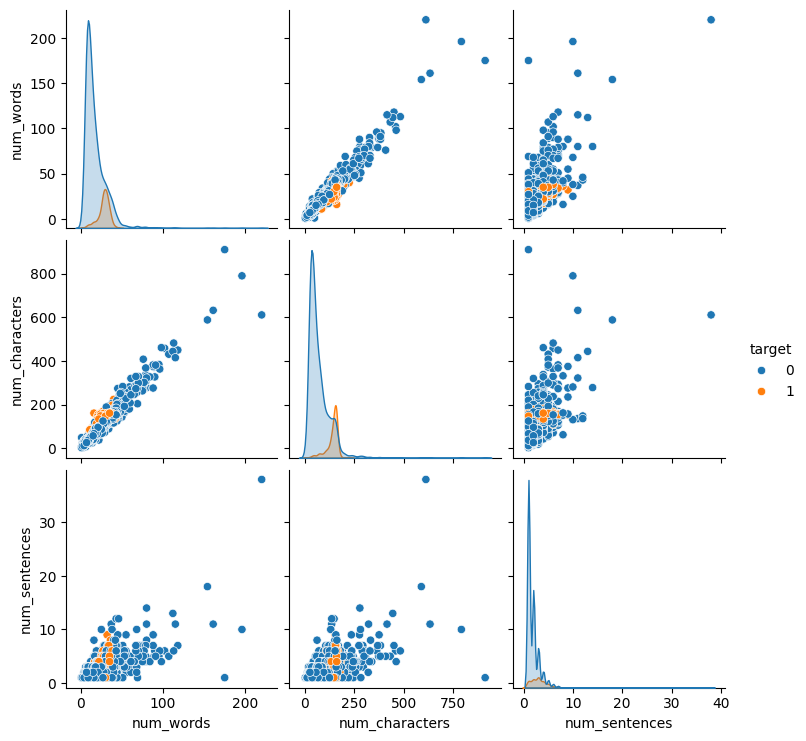

In [74]:
sns.pairplot(df,hue='target')

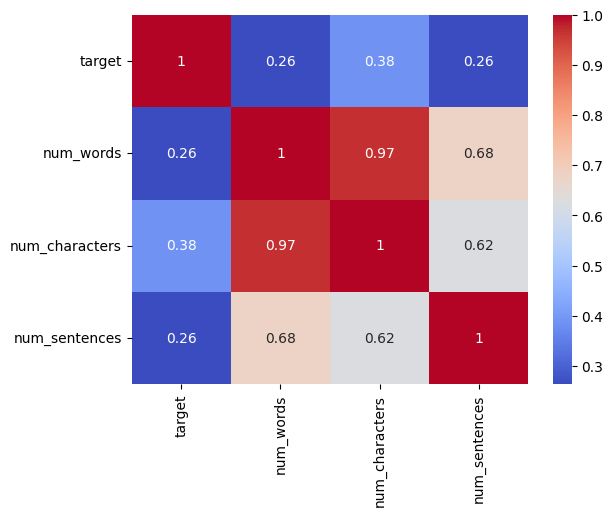

In [76]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 3. Data Preprocessing

In [79]:
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [83]:
transform_text(
'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [85]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [87]:
df['transformed_text'] = df['text'].apply(transform_text)

In [88]:
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [89]:
!pip install wordcloud


In [93]:
import sys
!{sys.executable} -m pip install wordcloud


In [95]:
from wordcloud import WordCloud
spam_wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')
ham_wc = WordCloud(width=500, height=500,min_font_size=10,background_color='white')

In [97]:
spam_wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

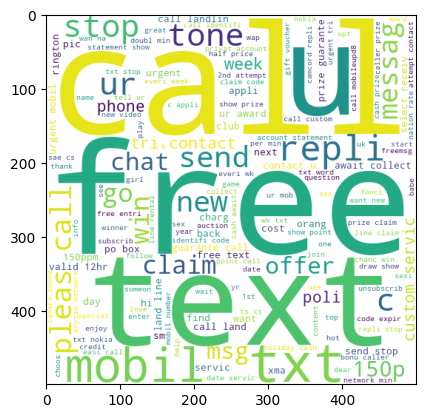

In [99]:
plt.imshow(spam_wc)

In [101]:
ham_wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

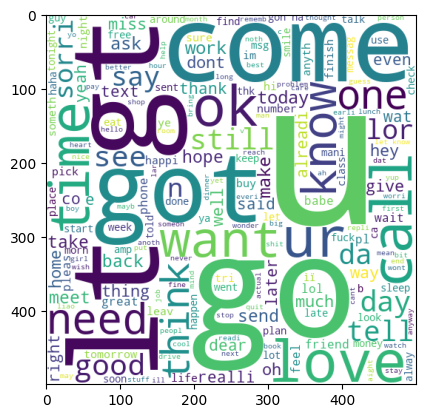

In [103]:
plt.imshow(ham_wc)

In [105]:
df.head()

,target,text,num_words,num_characters,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


In [107]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [109]:
len(spam_corpus)

9939

In [111]:
from collections import Counter
word_counts = Counter(spam_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

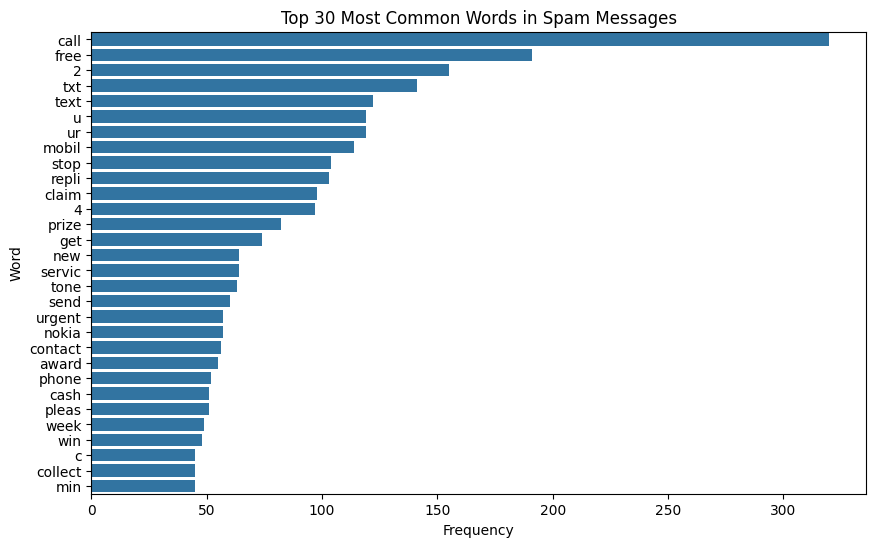

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_wc)
plt.title("Top 30 Most Common Words in Spam Messages")
plt.show()

In [115]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [117]:
len(ham_corpus)

35404

In [119]:
word_counts = Counter(ham_corpus).most_common(30)
df_wc = pd.DataFrame(word_counts, columns=['Word', 'Frequency'])

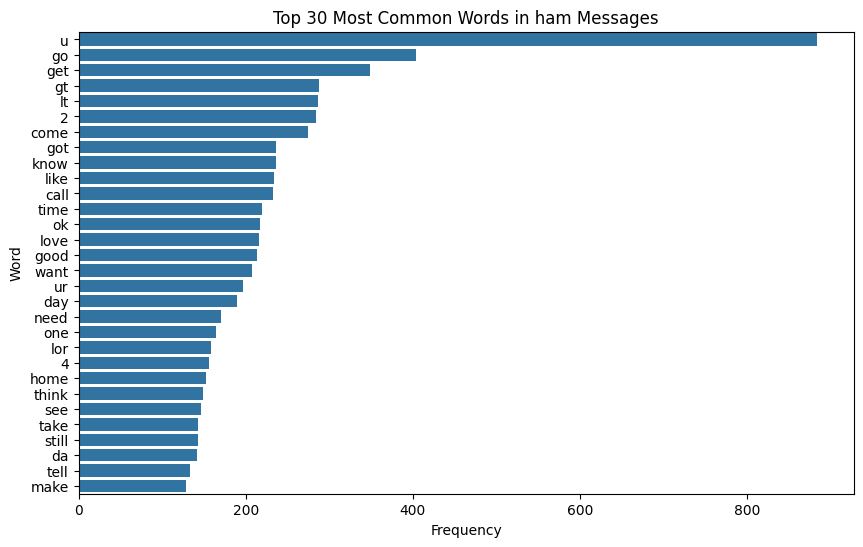

In [121]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_wc)
plt.title("Top 30 Most Common Words in ham Messages")
plt.show()

## 4. Model Building

In [124]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [126]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [128]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [132]:
y = df['target'].values

In [134]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [138]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [140]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [142]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [144]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [146]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [148]:
#tfidf --> MNB

In [150]:
!pip install xgboost

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [154]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc,
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc, 
    'GBDT':gbdt, 
    'xgb':xgb
}

In [158]:
from sklearn.svm import SVC
svc = SVC()  # You can add parameters here if needed


In [160]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision


In [162]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.97678916827853, 0.9830508474576272)

In [163]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("for ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
for  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
for  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
for  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
for  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
for  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
for  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
for  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
for  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
for  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
for  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [166]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [168]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.978723,0.946154
5,RF,0.975822,0.982906
8,ETC,0.974855,0.974576
0,SVC,0.969052,0.927419
4,LR,0.967118,0.964286
10,xgb,0.967118,0.926230
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
9,GBDT,0.946809,0.919192
3,DT,0.927466,0.811881


In [170]:
performance_df1 =pd.melt(performance_df, id_vars = "Algorithm")

In [172]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.978723
1,RF,Accuracy,0.975822
2,ETC,Accuracy,0.974855
3,SVC,Accuracy,0.969052
4,LR,Accuracy,0.967118
5,xgb,Accuracy,0.967118
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.958414
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.927466


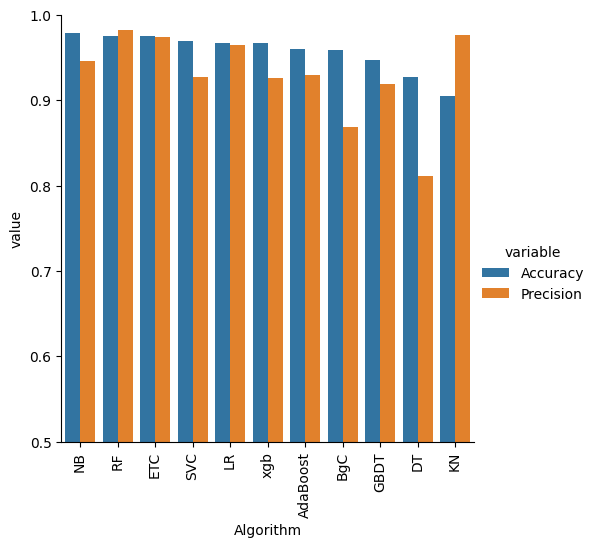

In [174]:
sns.catplot(x = 'Algorithm', y='value',
           hue = 'variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [176]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [178]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [180]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [182]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [184]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [186]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154,0.978723,0.946154
1,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
2,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
3,SVC,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419,0.969052,0.927419
4,LR,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286,0.967118,0.964286
5,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,DT,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881,0.927466,0.811881


In [188]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [190]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [192]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [194]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.968


In [196]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [198]:
from sklearn.ensemble import StackingClassifier

In [200]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [202]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [204]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))